In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
fdiry = file.path(FD_RES, "source", "TF_modules")
dir(fdiry)

[1] "K562.full.region.assignments.txt" "K562.TFzscore.txt"

In [23]:
### set file directory
fdiry = file.path(FD_RES, "source", "TF_modules")
fname = "K562.full.region.assignments.txt"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath)

### assign and show info
dat_region = dat
print(dim(dat))
head(dat)

Rows: 173997 Columns: 74
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): chr, TFs
dbl (72): 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 173997     74


1,2,3,4,5,6,7,8,9,10,⋯,71,72,73,74,75,77,chr,start,end,TFs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
0,1,0,0,1,0,0,0,0,1,⋯,0,0,0,0,0,0,chr1,115702,115751,"NONO,RNF2,FOXK2,NR2F1,SOX6,ESRRA,ATF4,GMEB1,NFIC,TRIM24,HDAC1,TCF12,NCOR1,NFE2,ATF7,ZNF24,GABPB1,ZBTB2,MTA3,FOXM1,ZBTB40,DPF2,NFRKB,HDAC2,GATAD2A,IKZF1,ARID3A,NBN,EP300,SMARCE1,ZNF281,KDM1A,NCOA1,MAFG,POLR2A,EGR1,REST,TCF3,SMARCC2,MTA1,MEIS2"
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,chr1,118585,118665,"RNF2,MAFG,NFE2L1,NFE2"
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,chr1,136446,136510,"CEBPB,ESRRA,NR2F1,EGR1"
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,chr1,139031,139110,"ZFX,CTCF,RFX1"
0,1,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,chr1,268005,268051,"SMC3,CTCF,MAZ,ATF7,ARID2,ZNF281,REST,RAD21"
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,chr1,586187,586203,"CTCF,MAZ,SMC3"


In [26]:
### set file directory
fdiry = file.path(FD_RES, "source", "TF_modules")
fname = "K562.TFzscore.txt"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath)

### assign and show info
dat_tfzscore = dat
print(dim(dat))
head(dat)

Rows: 2503 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): TF
dbl (1): module

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 2503    2


module,TF
<dbl>,<chr>
1,ZNF589
1,JUNB
1,FOSL1
1,MEIS2
1,EGR1
1,MEF2D


In [30]:
dat = dat_tfzscore
lst = split(dat$TF, dat$module)
res = lapply(lst, length)
dat = data.frame(Module = names(res), Count = unlist(res))
dat = dat %>% dplyr::mutate(Module = factor(Module, levels=1:77))
head(dat)

,Module,Count
,<fct>,<int>
1,1,34
2,2,11
3,3,37
4,4,15
5,5,46
6,6,10


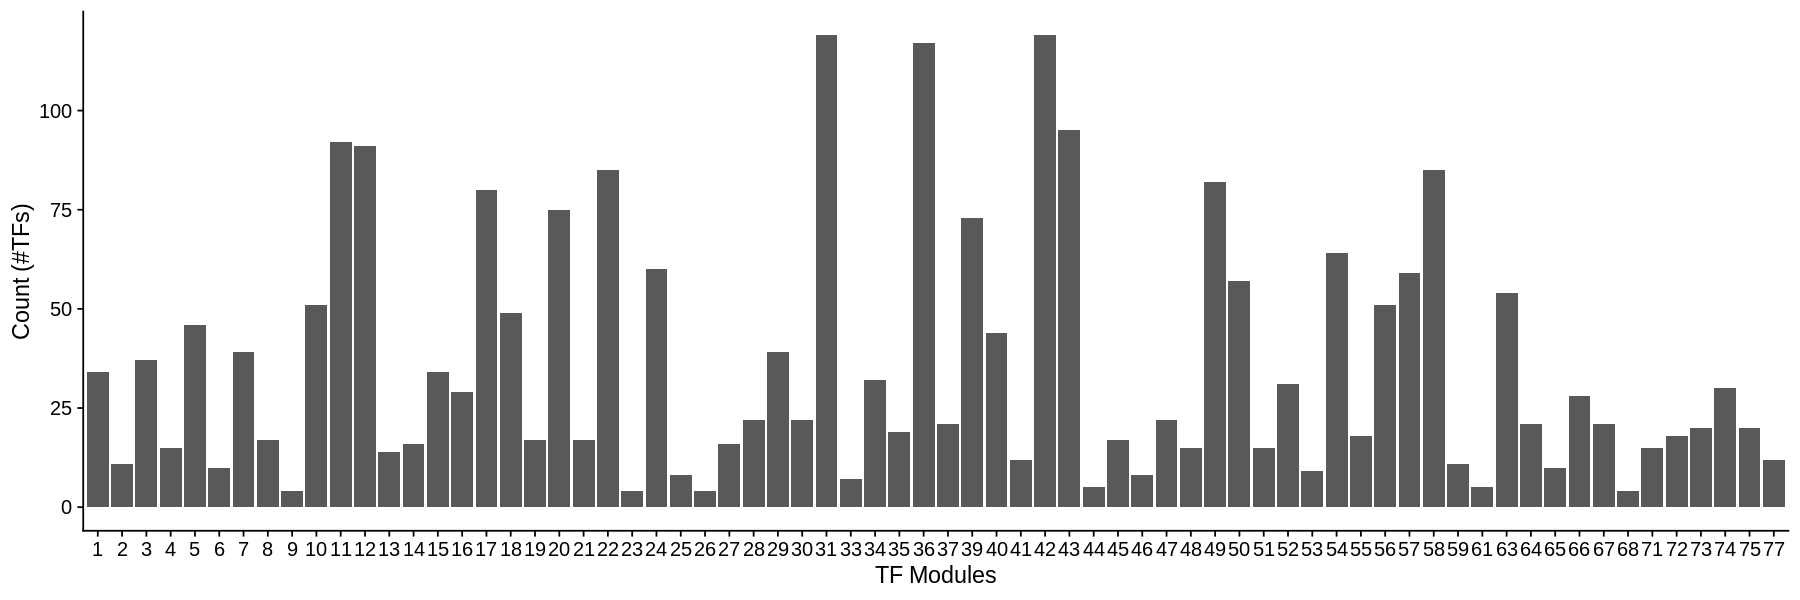

In [34]:
gpt = ggplot(dat, aes(x=Module, y=Count)) + 
    geom_col() + 
    labs(x="TF Modules", y="Count (#TFs)") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=15)
print(gpt)

In [40]:
paste(sort(lst[[1]]), collapse=", ") 

[1] "ARID3A, ATF2, ATF3, ATF7, BHLHE40, CREM, DPF2, EGR1, EHMT2, EP300, FOSL1, FOXA3, FOXK2, IKZF1, JUN, JUNB, JUND, LCOR, MEF2A, MEF2D, MEIS2, NR2F1, PBX2, PRDM10, RCOR1, RNF2, SMARCC2, SMARCE1, SOX6, TCF3, TEAD1, TEAD4, ZNF318, ZNF589"

In [24]:
CHROMS = paste0("chr", c(1:22, "X", "Y"))
dat = dat_region
dat = dat %>% dplyr::filter(chr %in% CHROMS)
table(dat$chr)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
20011  7690  8866  8630  2439  3955  5440  6940  7997  3019  9143 12289  4712 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
 2278  4669 10238  6871  8448 11951 10825  7125  6316  4130 

In [5]:
colnames(dat)

[1] "1"     "2"     "3"     "4"     "5"     "6"     "7"     "8"     "9"    
[10] "10"    "11"    "12"    "13"    "14"    "15"    "16"    "17"    "18"   
[19] "19"    "20"    "21"    "22"    "23"    "24"    "25"    "26"    "27"   
[28] "28"    "29"    "30"    "31"    "33"    "34"    "35"    "36"    "37"   
[37] "39"    "40"    "41"    "42"    "43"    "44"    "45"    "46"    "47"   
[46] "48"    "49"    "50"    "51"    "52"    "53"    "54"    "55"    "56"   
[55] "57"    "58"    "59"    "61"    "63"    "64"    "65"    "66"    "67"   
[64] "68"    "71"    "72"    "73"    "74"    "75"    "77"    "chr"   "start"
[73] "end"   "TFs"

In [6]:
library(pheatmap)

In [25]:
dat = dat_region
dat = dat %>% 
    dplyr::mutate(Loc = paste0(chr, ":", start, "-", end)) %>%
    dplyr::filter(chr %in% CHROMS) %>%
    dplyr::mutate(chr = factor(chr, levels=CHROMS)) 

set.seed(123)
dat = dat %>% dplyr::slice_sample(n=10000) %>%
    dplyr::arrange(chr, start, end)

mat = dat %>% 
    dplyr::select(-chr, -start, -end, -TFs) %>% 
    column_to_rownames("Loc")

ant = dat %>% 
    dplyr::select(Loc, chr) %>% 
    column_to_rownames("Loc")

head(mat)

,1,2,3,4,5,6,7,8,9,10,⋯,65,66,67,68,71,72,73,74,75,77
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:861878-862129,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:921082-921616,0,0,1,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:923234-923417,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:941420-941995,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:960392-960709,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:980693-980811,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


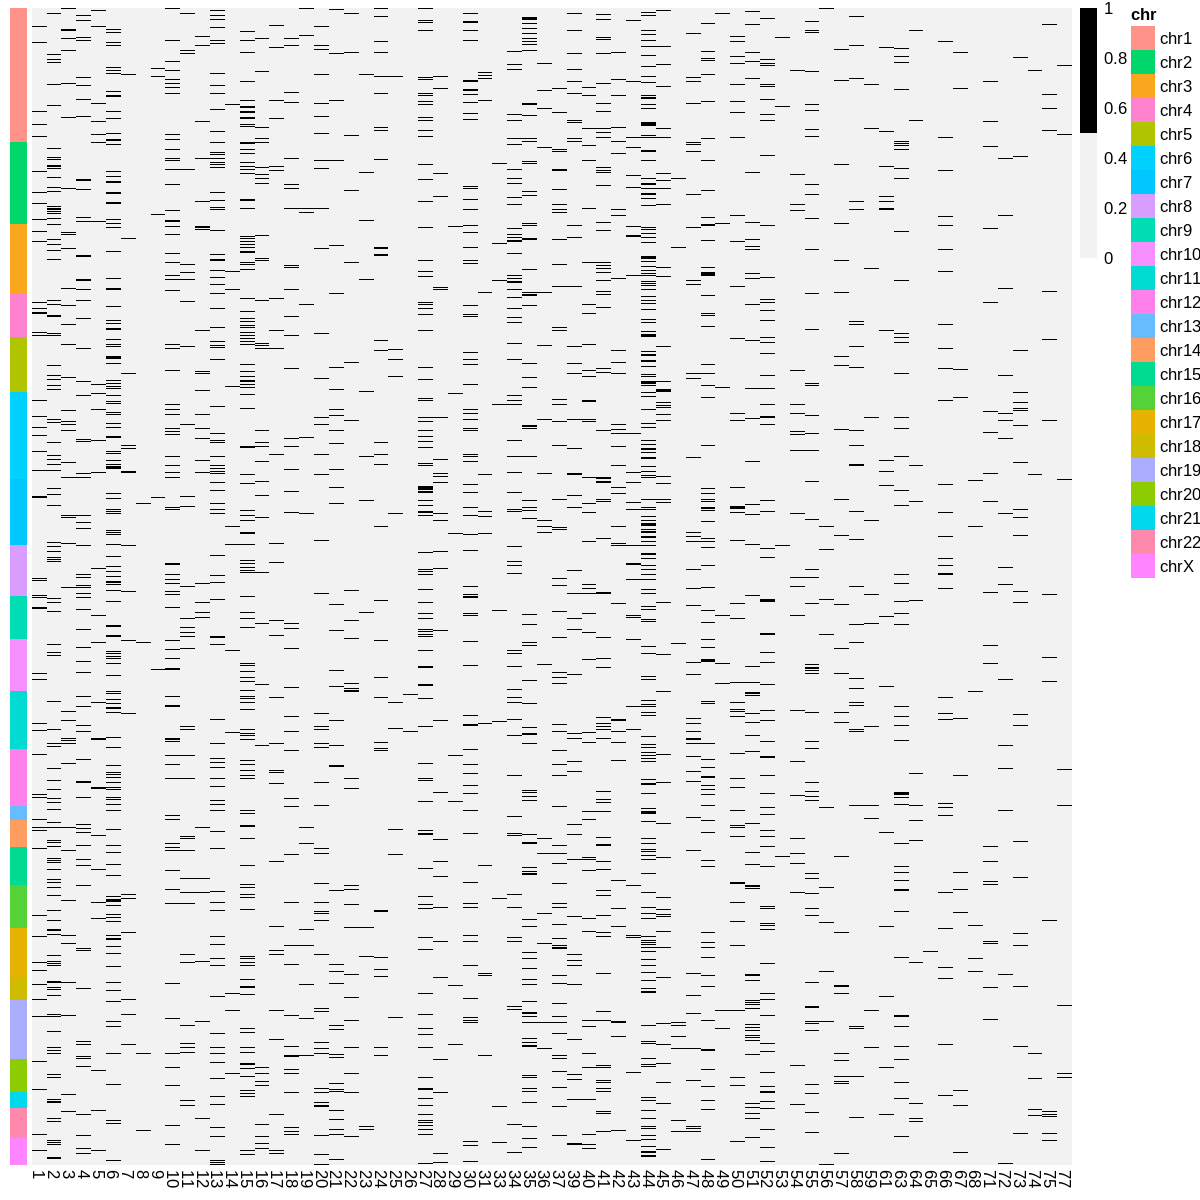

In [22]:
myColor = c("grey95", "black")
myBreaks = c(0, 0.5, 1)

options(repr.plot.height=10, repr.plot.width=10)
pheatmap(mat,
         cluster_row  = FALSE,
         cluster_cols = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = ant,
         color=myColor, 
         breaks=myBreaks)